#                               Fake News Detection

To build a model to accurately classify a piece of news as REAL or FAKE.

### About Dataset

### Import Python packages and libraries

In [11]:
import pandas as pd
import numpy as np
import itertools

#Import Library for Accuracy Score
from sklearn.metrics import accuracy_score

### Loading data

In [12]:
df=pd.read_csv("news.csv")

### Understanding data

In [13]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [14]:
df.shape

(6335, 4)

In [15]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [16]:
labels=df.label

In [17]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'],test_size=0.2,random_state=42)

### Data_Modelling

### Transforming data from text_form to data_form

In [19]:
#Importing TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#initializa TfidfVectorizer
vector=TfidfVectorizer(stop_words="english",max_df=0.7)

#fit and transform
tf_train=vector.fit_transform(x_train)
tf_test=vector.transform(x_test)

In [20]:
#Logistic Regression


#Import Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression Classifier
logisreg = LogisticRegression()

#Train the model using Training Dataset
logisreg.fit(tf_train, y_train)

# Prediction using test data
y_pred = logisreg.predict(tf_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_logisreg = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logisreg )

Accuracy of Logistic Regression model :  91.55


In [21]:
#Random Forest

#Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest
model = RandomForestClassifier()

#Train the model using Training Dataset
model.fit(tf_train, y_train)

# Prediction using test data
y_pred = model.predict(tf_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_rf = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Random Forest : ', acc_rf)

Accuracy of  Random Forest :  90.92


In [22]:
#Support Vector Machine Model

#Import Library for Support Vector Machine Model
from sklearn import svm

#Initialize the Support Vector Classifier
model = svm.SVC()

#Train the model using Training Dataset
model.fit(tf_train, y_train)

# Prediction using test data
y_pred = model.predict(tf_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_svc = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Support Vector Classifier: ', acc_svc)

Accuracy of  Support Vector Classifier:  93.05


In [23]:
#Passive Aggresive Classifier

#Import Library for Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier



#initialize a PassiveAggresiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train,y_train)

#prediction 1st dataset

y_pred=pac.predict(tf_test)
acc_passive=round(accuracy_score(y_test,y_pred)*100,2)

print( 'Accuracy of Passive Aggressive Classifier model : ', acc_passive )

Accuracy of Passive Aggressive Classifier model :  93.53


## Model Selection

In [24]:
models=pd.DataFrame({"Model":["Logistic Regression","Passive Aggresive Classifier","Random Forest","Support Vector Machine"],
                "Score":[acc_logisreg, acc_passive, acc_rf, acc_svc]})

In [25]:
models.sort_values(by="Score",ascending=False)

,Model,Score
1,Passive Aggresive Classifier,93.53
3,Support Vector Machine,93.05
0,Logistic Regression,91.55
2,Random Forest,90.92


We can select the Passive Aggresive Classifier as it has given us the maximum accuracy

## Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[588,  40],
       [ 42, 597]], dtype=int64)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


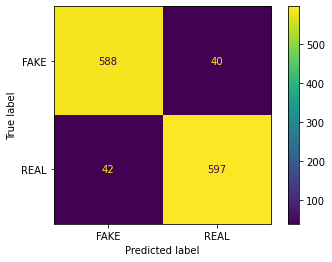

In [27]:
plot_confusion_matrix(pac,tf_test,y_test)